In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler


In [217]:
# Load the dataset
df = pd.read_csv('jobs_in_data.csv')

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           9355 non-null   int64  
 1   job_title           9329 non-null   object 
 2   job_category        9349 non-null   object 
 3   salary_currency     9343 non-null   object 
 4   salary              5516 non-null   float64
 5   salary_in_usd       8535 non-null   float64
 6   employee_residence  9349 non-null   object 
 7   experience_level    9345 non-null   object 
 8   employment_type     9344 non-null   object 
 9   work_setting        9345 non-null   object 
 10  company_location    9347 non-null   object 
 11  company_size        9345 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 877.2+ KB


In [219]:
# Display first 5 rows
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,NaN,95012.0,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,NaN,186000.0,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800.0,NaN,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,NaN,212000.0,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,NaN,93300.0,United States,Senior,Full-time,In-person,United States,M


In [220]:
# Check the shape (rows, columns)
print(f"Dataset shape: {df.shape}")

Dataset shape: (9355, 12)


In [221]:
# Numerical columns statistics
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,5516.000000,8535.000000
mean,2022.760449,150302.934554,149171.000000
std,0.519470,64022.058886,63150.764843
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105500.000000,105000.000000
50%,2023.000000,143862.500000,142200.000000
75%,2023.000000,186700.000000,185900.000000
max,2023.000000,450000.000000,450000.000000


In [222]:
# Categorical columns statistics
df.describe(include=['object'])

,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9329,9349,9343,9349,9345,9344,9345,9347,9345
unique,125,10,11,83,4,4,3,70,3
top,Data Engineer,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
freq,2189,3010,8582,8081,6704,9299,5726,8126,8439


In [224]:
# Categorical columns statistics
df.describe(include=['object'])

,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9329,9349,9343,9349,9345,9344,9345,9347,9345
unique,125,10,11,83,4,4,3,70,3
top,Data Engineer,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
freq,2189,3010,8582,8081,6704,9299,5726,8126,8439


In [225]:
# Get all duplicate rows (keeping all copies)
duplicates = df[df.duplicated(keep=False)]

# Display duplicates
duplicates.sort_values(by=list(df.columns))

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
9280,2021,Data Scientist,Data Science and Research,EUR,76760.0,90734.0,Germany,Mid-level,Full-time,Hybrid,Germany,L
9314,2021,Data Scientist,Data Science and Research,EUR,76760.0,90734.0,Germany,Mid-level,Full-time,Hybrid,Germany,L
8574,2022,Analytics Engineer,Leadership and Management,USD,63000.0,63000.0,United States,Senior,Full-time,In-person,United States,M
8598,2022,Analytics Engineer,Leadership and Management,USD,63000.0,63000.0,United States,Senior,Full-time,In-person,United States,M
7989,2022,Analytics Engineer,Leadership and Management,USD,231250.0,231250.0,United States,Senior,Full-time,Remote,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
3298,2023,Research Scientist,Data Science and Research,USD,NaN,248100.0,United States,Senior,Full-time,In-person,United States,M
4067,2023,Research Scientist,Data Science and Research,USD,NaN,248100.0,United States,Senior,Full-time,In-person,United States,M
5075,2023,Research Scientist,Data Science and Research,USD,NaN,248100.0,United States,Senior,Full-time,In-person,United States,M
954,2023,Research Scientist,Data Science and Research,USD,NaN,303050.0,United States,Senior,Full-time,In-person,United States,M


In [226]:
# Keep only the first occurrence of each duplicate
df = df.drop_duplicates()

# Reset index after removal (optional)
df.reset_index(drop=True, inplace=True)

In [227]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (6640, 12)


In [228]:
#check null value
df.isnull().sum()

work_year                0
job_title               26
job_category             6
salary_currency         12
salary                2747
salary_in_usd          731
employee_residence       6
experience_level        10
employment_type         11
work_setting            10
company_location         8
company_size            10
dtype: int64

In [229]:
# Calculate percentage of missing values rounded to 2 decimal points
round(df.isnull().mean() * 100, 2)

work_year              0.00
job_title              0.39
job_category           0.09
salary_currency        0.18
salary                41.37
salary_in_usd         11.01
employee_residence     0.09
experience_level       0.15
employment_type        0.17
work_setting           0.15
company_location       0.12
company_size           0.15
dtype: float64

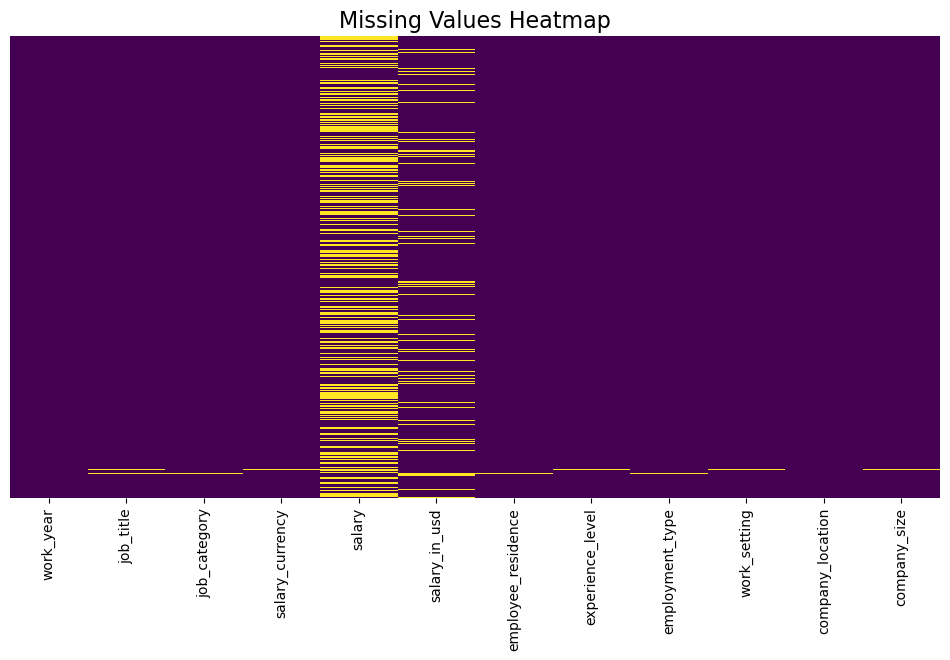

In [230]:
# Create a binary matrix indicating missing values (True = missing)
missing_matrix = df.isnull()

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_matrix, cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=16)
plt.show()

In [231]:
# find all rows where the job_title column is missing(NaN)
df[df['job_title'].isna()]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
5,2023,NaN,NaN,USD,130000.0,NaN,United States,NaN,Full-time,Remote,United States,NaN
29,2023,NaN,Machine Learning and AI,NaN,273400.0,273400.0,United States,Senior,NaN,In-person,NaN,M
105,2023,NaN,NaN,USD,185900.0,NaN,United States,Senior,Full-time,NaN,United States,M
185,2023,NaN,Data Architecture and Modeling,NaN,NaN,73100.0,United States,NaN,Full-time,In-person,NaN,M
278,2023,NaN,Data Engineering,NaN,NaN,219650.0,United States,NaN,Full-time,NaN,United States,NaN
350,2023,NaN,Data Engineering,USD,NaN,111400.0,NaN,Mid-level,NaN,In-person,NaN,M
549,2023,NaN,Machine Learning and AI,NaN,324000.0,NaN,United States,Senior,NaN,In-person,United States,NaN
682,2023,NaN,Data Science and Research,NaN,NaN,138510.0,United States,NaN,Full-time,In-person,NaN,M
822,2023,NaN,Data Architecture and Modeling,USD,NaN,81800.0,United States,NaN,NaN,In-person,NaN,M
1719,2023,NaN,Data Engineering,USD,NaN,90000.0,NaN,Mid-level,NaN,Remote,United States,NaN


In [232]:
#remove rows where the job_title is null (NaN)
df = df.dropna(subset=['job_title'])

In [233]:
#check null value after handlig null job_category
df.isnull().sum()

work_year                0
job_title                0
job_category             0
salary_currency          0
salary                2731
salary_in_usd          719
employee_residence       0
experience_level         0
employment_type          0
work_setting             0
company_location         0
company_size             0
dtype: int64

In [234]:
#Handling Missing salary_in_usd by Substituting with salary When Currency is USD

# Before handling missing values
print("Missing values in salary_in_usd before:", df['salary_in_usd'].isnull().sum())

# Create a condition where:
condition = (df['salary_in_usd'].isna() &         # salary_in_usd is missing (NaN)
             (df['salary_currency'] == 'USD') &   # salary_currency is 'USD'
             df['salary'].notna())                # salary is not missing

# Fill missing salary_in_usd with salary where condition is True
df.loc[condition, 'salary_in_usd'] = df.loc[condition, 'salary']

# After handling missing values
print("Missing values in salary_in_usd after:", df['salary_in_usd'].isnull().sum())

Missing values in salary_in_usd before: 719
Missing values in salary_in_usd after: 4


In [235]:
# find all rows where the salary_in_usd column is missing(NaN)
df[df['salary_in_usd'].isna()]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
3110,2023,Machine Learning Engineer,Machine Learning and AI,USD,NaN,NaN,United States,Senior,Full-time,In-person,United States,M
4343,2023,Data Scientist,Data Science and Research,USD,NaN,NaN,United States,Senior,Full-time,Remote,United States,M
4704,2023,Insight Analyst,Data Analysis,GBP,42000.0,NaN,United Kingdom,Mid-level,Full-time,In-person,United Kingdom,M
6633,2021,Applied Machine Learning Scientist,Machine Learning and AI,USD,NaN,NaN,United States,Mid-level,Full-time,Hybrid,United States,L


In [236]:
#remove rows where the salary_in_usd is null (NaN)
df = df.dropna(subset=['salary_in_usd'])

In [237]:
# Drop 'salary' due to high missing values; drop 'salary_currency' as it's meaningless without salary
df = df.drop(columns=['salary', 'salary_currency'])

In [238]:
# Get all duplicate rows (keeping all copies)
duplicates = df[df.duplicated(keep=False)]

# Display duplicates
duplicates.sort_values(by=list(df.columns))

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
6423,2021,Data Engineer,Data Engineering,200000.0,United States,Mid-level,Full-time,Remote,United States,L
6500,2021,Data Engineer,Data Engineering,200000.0,United States,Mid-level,Full-time,Remote,United States,L
5796,2022,Analytics Engineer,Leadership and Management,110000.0,United States,Senior,Full-time,Remote,United States,M
5831,2022,Analytics Engineer,Leadership and Management,110000.0,United States,Senior,Full-time,Remote,United States,M
5795,2022,Analytics Engineer,Leadership and Management,130000.0,United States,Senior,Full-time,Remote,United States,M
...,...,...,...,...,...,...,...,...,...,...
499,2023,Research Scientist,Data Science and Research,323300.0,United States,Senior,Full-time,In-person,United States,M
3338,2023,Research Scientist,Data Science and Research,323300.0,United States,Senior,Full-time,In-person,United States,M
740,2023,Research Scientist,Data Science and Research,370000.0,United States,Senior,Full-time,In-person,United States,M
3497,2023,Research Scientist,Data Science and Research,370000.0,United States,Senior,Full-time,In-person,United States,M


In [239]:
# Keep only the first occurrence of each duplicate
df = df.drop_duplicates()

# Reset index after removal (optional)
df.reset_index(drop=True, inplace=True)

In [240]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (5327, 10)


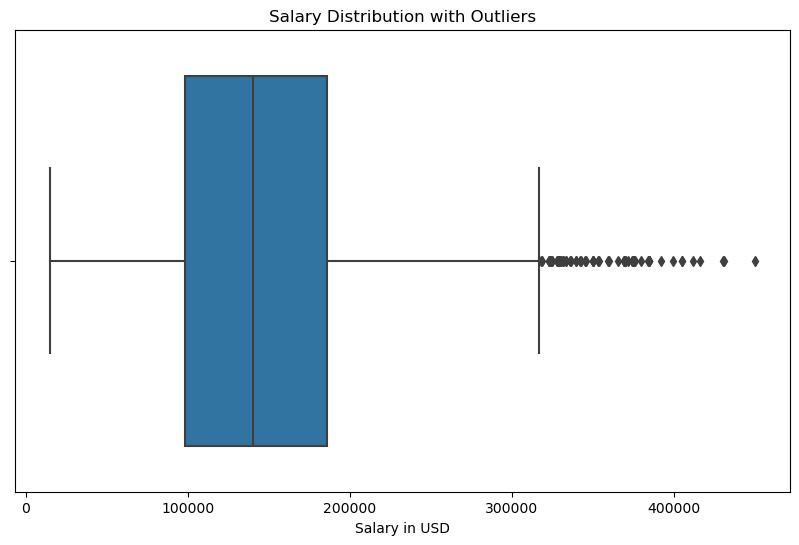

In [241]:
#check outliers by boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Salary Distribution with Outliers')
plt.xlabel('Salary in USD')
plt.show()

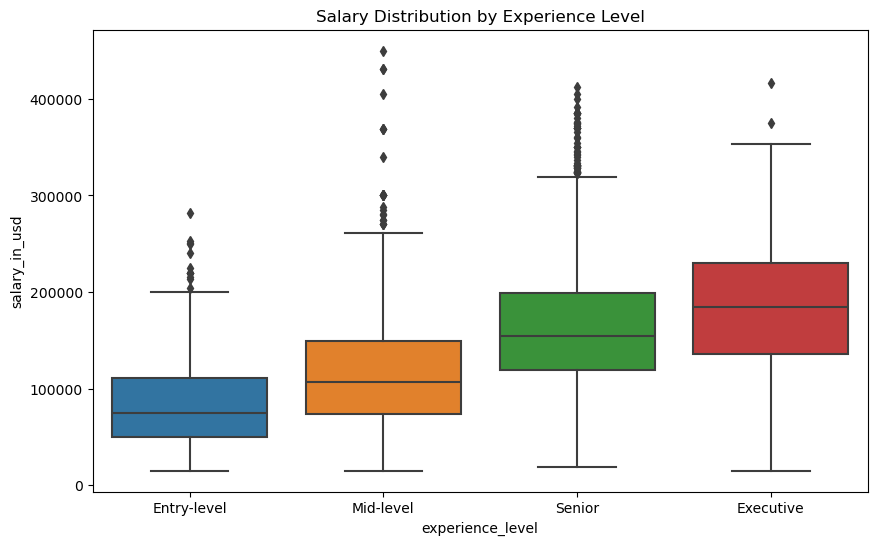

In [242]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df,
            order=['Entry-level', 'Mid-level', 'Senior', 'Executive'])
plt.title('Salary Distribution by Experience Level')
plt.show()

In [243]:
def winsorize_by_group(df, group_col, value_col, lower_percentile=0.05, upper_percentile=0.95):
    def winsorize_series(group):
        lower = group[value_col].quantile(lower_percentile)
        upper = group[value_col].quantile(upper_percentile)
        group[value_col] = group[value_col].clip(lower=lower, upper=upper)
        return group
    
    return df.groupby(group_col, group_keys=False).apply(winsorize_series)
df = winsorize_by_group(df, 'experience_level', 'salary_in_usd', 0.05, 0.95)

  

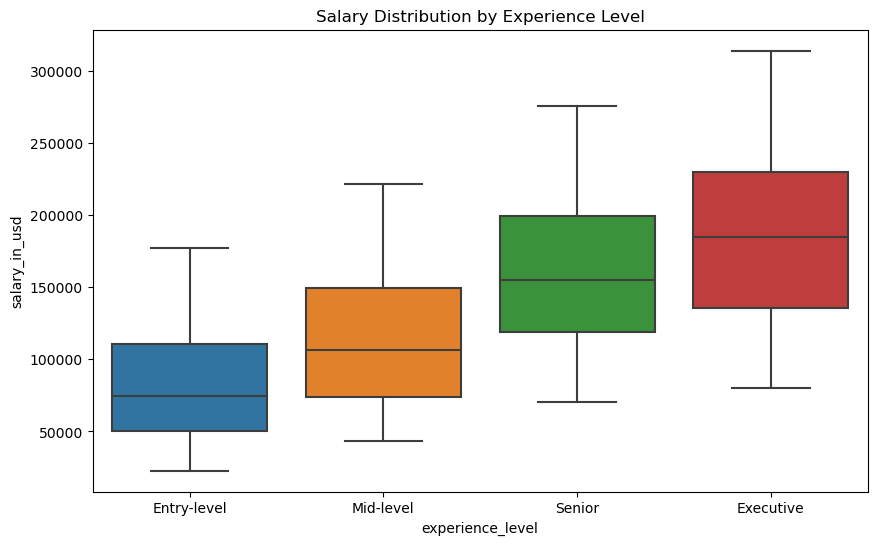

In [244]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df,
            order=['Entry-level', 'Mid-level', 'Senior', 'Executive'])
plt.title('Salary Distribution by Experience Level')
plt.show()

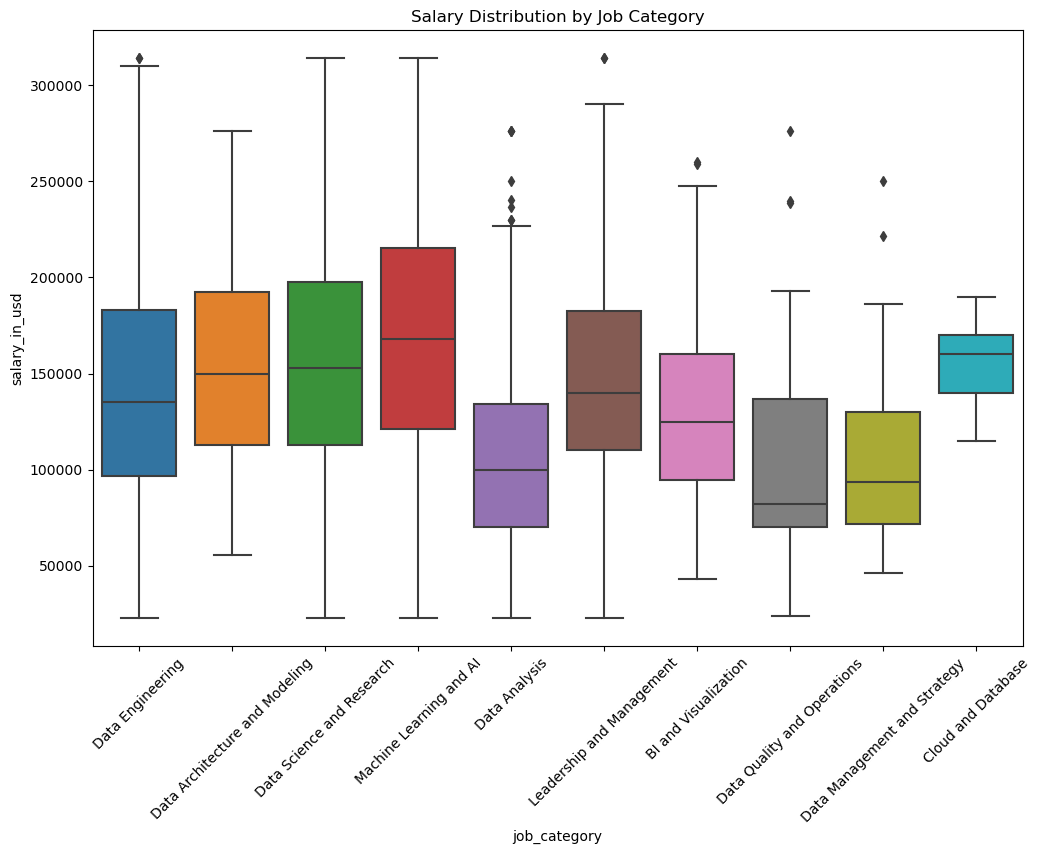

In [245]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='job_category', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()

In [246]:
def winsorize_by_group(df, group_col, value_col, lower_percentile=0.05, upper_percentile=0.95):
    def winsorize_series(group):
        lower = group[value_col].quantile(lower_percentile)
        upper = group[value_col].quantile(upper_percentile)
        group[value_col] = group[value_col].clip(lower=lower, upper=upper)
        return group
    
    return df.groupby(group_col, group_keys=False).apply(winsorize_series)
df = winsorize_by_group(df, 'job_category', 'salary_in_usd', 0.05, 0.95)


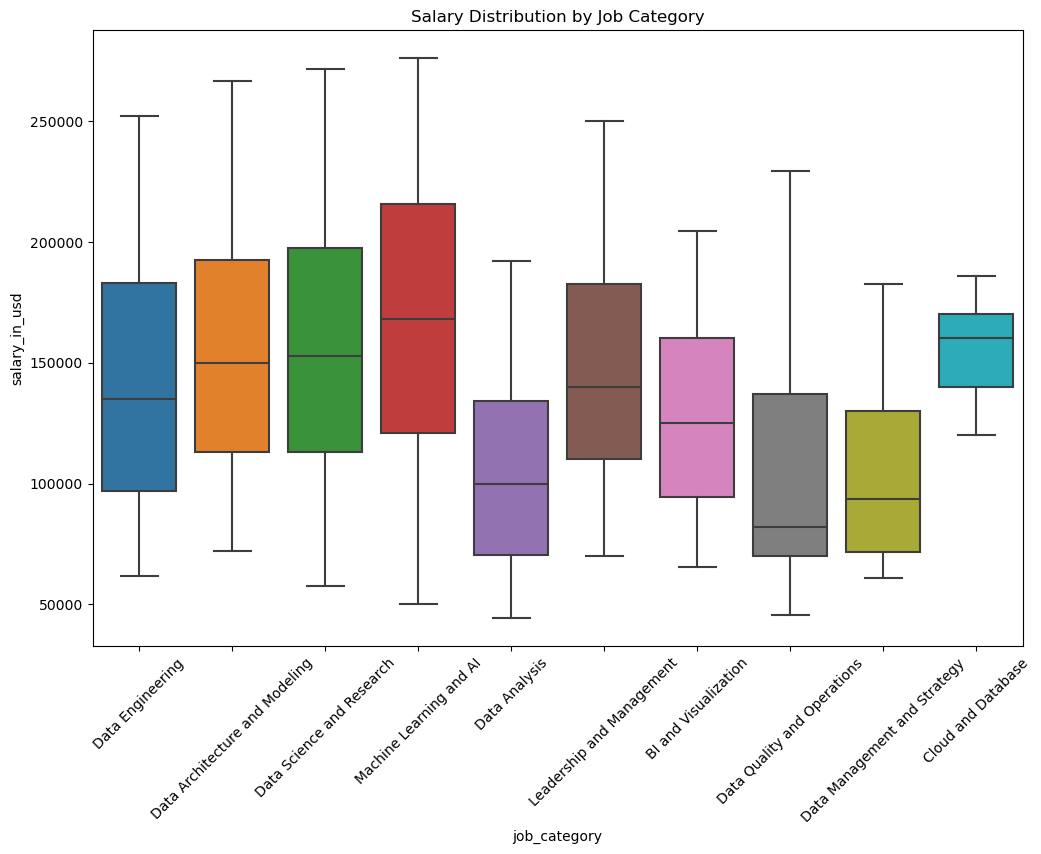

In [247]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='job_category', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Job Category')
plt.xticks(rotation=45)
plt.show()

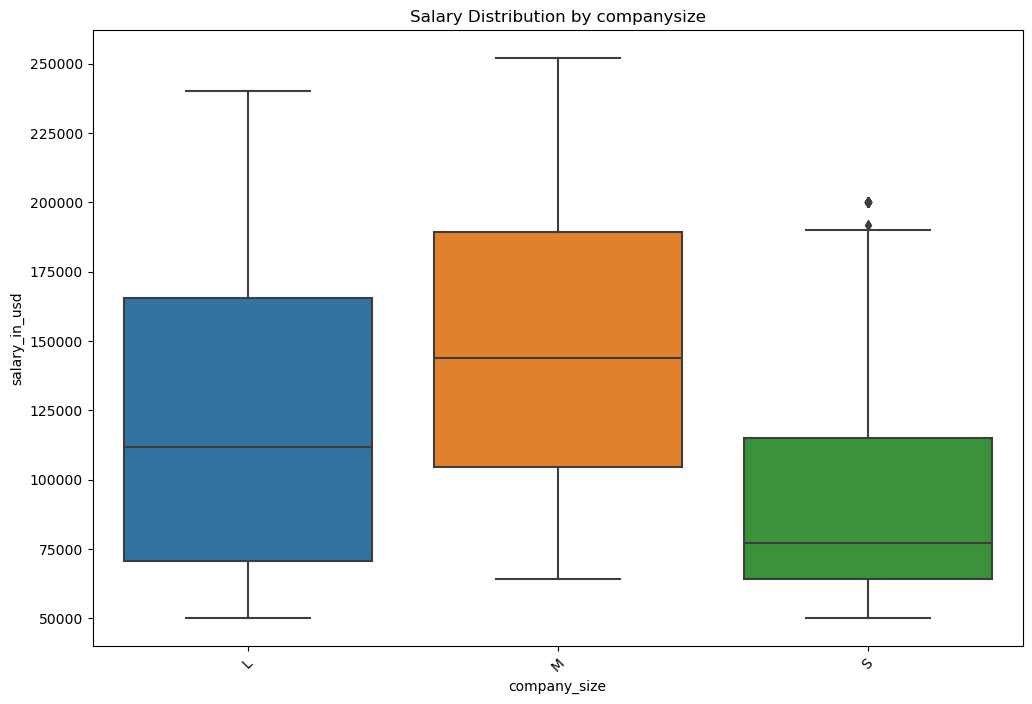

In [310]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by companysize')
plt.xticks(rotation=45)
plt.show()

In [249]:
def winsorize_by_group(df, group_col, value_col, lower_percentile=0.05, upper_percentile=0.95):
    def winsorize_series(group):
        lower = group[value_col].quantile(lower_percentile)
        upper = group[value_col].quantile(upper_percentile)
        group[value_col] = group[value_col].clip(lower=lower, upper=upper)
        return group
    
    return df.groupby(group_col, group_keys=False).apply(winsorize_series)
df = winsorize_by_group(df, 'company_size', 'salary_in_usd', 0.05, 0.95)


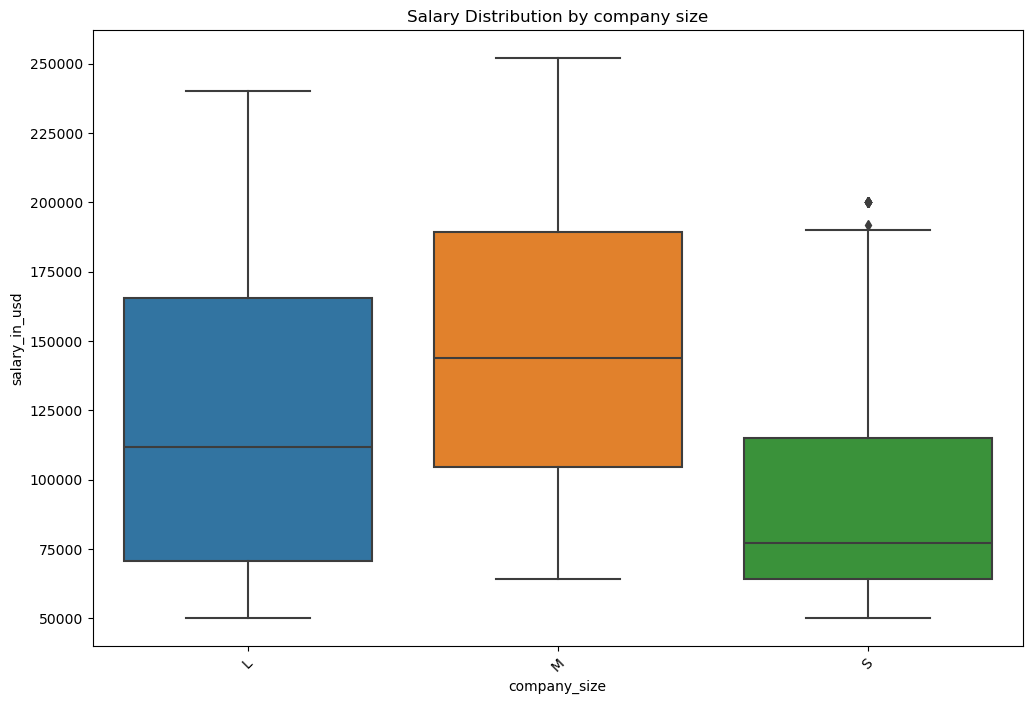

In [311]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title('Salary Distribution by company size')
plt.xticks(rotation=45)
plt.show()

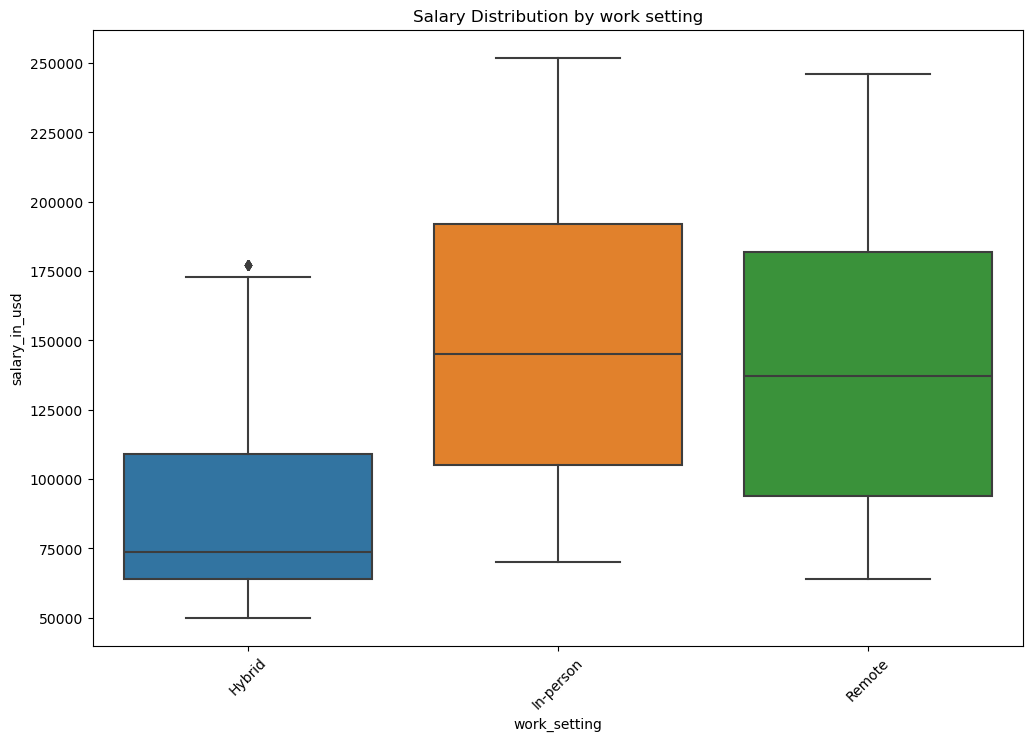

In [312]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='work_setting', y='salary_in_usd', data=df)
plt.title('Salary Distribution by work setting')
plt.xticks(rotation=45)
plt.show()

In [252]:
def winsorize_by_group(df, group_col, value_col, lower_percentile=0.05, upper_percentile=0.95):
    def winsorize_series(group):
        lower = group[value_col].quantile(lower_percentile)
        upper = group[value_col].quantile(upper_percentile)
        group[value_col] = group[value_col].clip(lower=lower, upper=upper)
        return group
    
    return df.groupby(group_col, group_keys=False).apply(winsorize_series)
df = winsorize_by_group(df, 'work_setting', 'salary_in_usd', 0.05, 0.95)


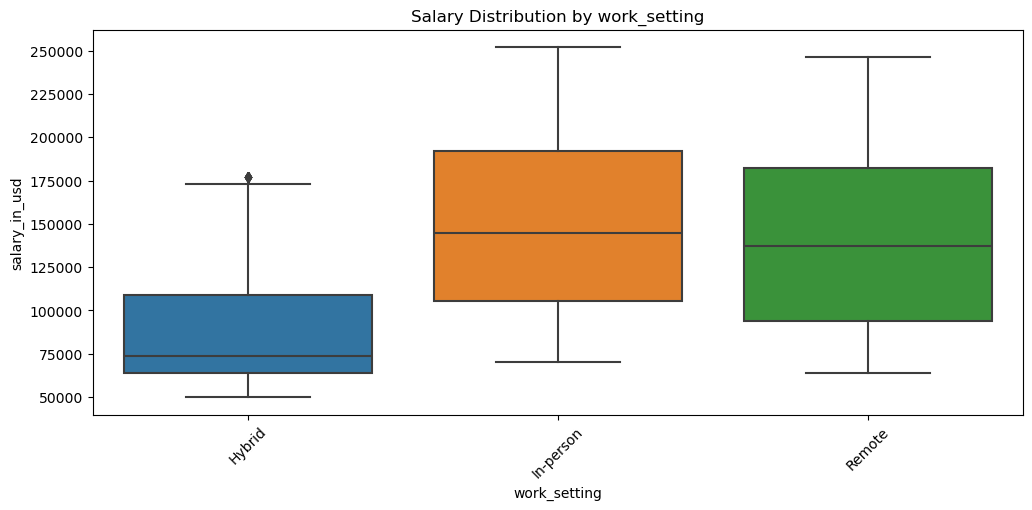

In [313]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='work_setting', y='salary_in_usd', data=df)
plt.title('Salary Distribution by work_setting')
plt.xticks(rotation=45)
plt.show()

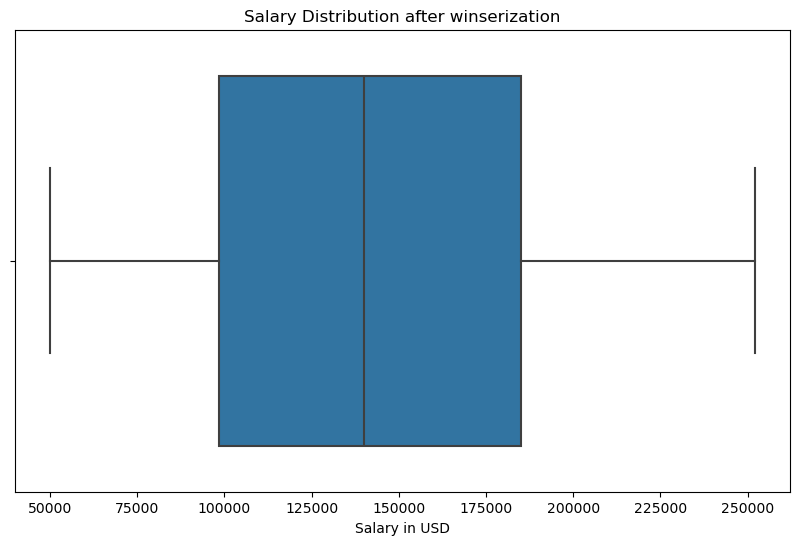

In [254]:
#check outliers by boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Salary Distribution after winserization')
plt.xlabel('Salary in USD')
plt.show()

C:\Users\hbste\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


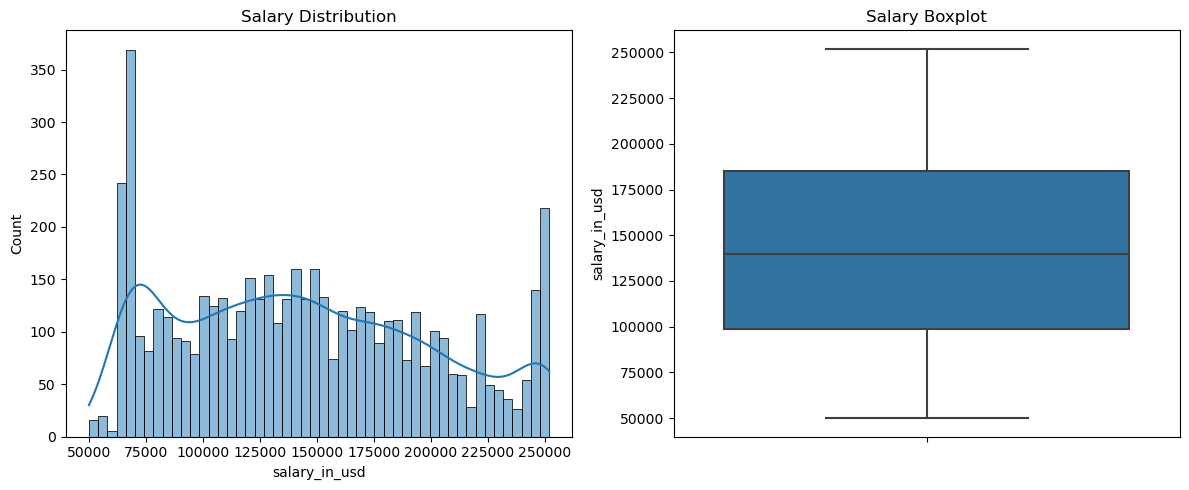

In [255]:
#check skewness
plt.figure(figsize=(12, 5))
# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Salary Distribution')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['salary_in_usd'])
plt.title('Salary Boxplot')

plt.tight_layout()
plt.show()

In [256]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
salary_skew = skew(df['salary_in_usd'])
print(f"Skewness: {salary_skew:.2f}")

# Interpretation guide
print("\nSkewness Interpretation:")
print("0: Perfectly symmetrical")
print("0 to 0.5: Fairly symmetrical")
print("0.5 to 1: Moderately skewed")
print(">1: Highly skewed")

Skewness: 0.29

Skewness Interpretation:
0: Perfectly symmetrical
0 to 0.5: Fairly symmetrical
0.5 to 1: Moderately skewed
>1: Highly skewed


In [258]:
import numpy as np

# Log-transform the target
df['salary_qt'] = np.log1p(df['salary_in_usd'])


In [260]:
df.head()


,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_qt
0,2023,Data DevOps Engineer,Data Engineering,95012.0,Germany,Mid-level,Full-time,Hybrid,Germany,L,11.461769
1,2023,Data Architect,Data Architecture and Modeling,186000.0,United States,Senior,Full-time,In-person,United States,M,12.133507
2,2023,Data Architect,Data Architecture and Modeling,81800.0,United States,Senior,Full-time,In-person,United States,M,11.312045
3,2023,Data Scientist,Data Science and Research,212000.0,United States,Senior,Full-time,In-person,United States,M,12.264346
4,2023,Data Scientist,Data Science and Research,93300.0,United States,Senior,Full-time,In-person,United States,M,11.443586


In [261]:
# Drop one location column due to 97.8% overlap — both give nearly identical info
# Keeping only one to avoid redundancy and simplify the model
df.drop(columns=['employee_residence'], inplace=True)

In [262]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (5327, 10)


In [263]:
df.head()

,work_year,job_title,job_category,salary_in_usd,experience_level,employment_type,work_setting,company_location,company_size,salary_qt
0,2023,Data DevOps Engineer,Data Engineering,95012.0,Mid-level,Full-time,Hybrid,Germany,L,11.461769
1,2023,Data Architect,Data Architecture and Modeling,186000.0,Senior,Full-time,In-person,United States,M,12.133507
2,2023,Data Architect,Data Architecture and Modeling,81800.0,Senior,Full-time,In-person,United States,M,11.312045
3,2023,Data Scientist,Data Science and Research,212000.0,Senior,Full-time,In-person,United States,M,12.264346
4,2023,Data Scientist,Data Science and Research,93300.0,Senior,Full-time,In-person,United States,M,11.443586


In [270]:
#separate feature and target 
# Features (independent variables)
X = df.drop(columns=["salary_in_usd","salary_qt"])

# Target (dependent variable)
y = df["salary_qt"]

# Display shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (5327, 8)
Target shape: (5327,)


In [271]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes
print("model Training Features:", X_train.shape)
print("modelmodel Testing Features:", X_test.shape)
print("model Training Target:", y_train.shape)
print("model Testing Target:", y_test.shape)

model Training Features: (4261, 8)
modelmodel Testing Features: (1066, 8)
model Training Target: (4261,)
model Testing Target: (1066,)


Apply frequency encoding for high unique value

In [272]:
# Step 2: Frequency encoding on training data
high_cardinality_cols = ['job_title', 'company_location']

for col in high_cardinality_cols:
    freq_encoding = X_train[col].value_counts(normalize=True)  # relative frequency
    X_train[col + '_freq'] = X_train[col].map(freq_encoding)
    X_test[col + '_freq'] = X_test[col].map(freq_encoding)  # use train's encoding only

# Optional: Fill unseen categories in test set with 0 or a small value
X_test[[col + '_freq' for col in high_cardinality_cols]] = X_test[[col + '_freq' for col in high_cardinality_cols]].fillna(0)

# Step 3: Drop original high-cardinality columns
X_train.drop(columns=high_cardinality_cols, inplace=True)
X_test.drop(columns=high_cardinality_cols, inplace=True)

Apply One-Hot Encoding (for unordered categories)



In [273]:
#One-Hot Encode these (unordered categorical variables)
one_hot_cols = ['job_category', 'employment_type', 'work_setting']

# Apply to training set
X_train = pd.get_dummies(X_train, columns=one_hot_cols, drop_first=True) #drop_first=True to avoids multicollinearity.

# Apply same transformation to test set (ensure same columns)
X_test = pd.get_dummies(X_test, columns=one_hot_cols, drop_first=True)

# Align columns of test set with train set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

Apply Ordinal Encoding (for ordered categories)

In [274]:
#for experiance level
experience_map = {'Entry-level': 1, 'Mid-level': 2, 'Senior': 3, 'Executive': 4}
X_train['experience_level_encoded'] = X_train['experience_level'].map(experience_map)
X_test['experience_level_encoded'] = X_test['experience_level'].map(experience_map)

#for company size
# Company Size: S < M < L
size_map = {'S': 1, 'M': 2, 'L': 3}
X_train['company_size_encoded'] = X_train['company_size'].map(size_map)
X_test['company_size_encoded'] = X_test['company_size'].map(size_map)

# 5. Drop original ordinal columns
X_train.drop(columns=['experience_level', 'company_size'], inplace=True)
X_test.drop(columns=['experience_level', 'company_size'], inplace=True)

In [275]:
# Final check
print("Transformed X_train shape:", X_train.shape)
print("Transformed X_test shape:", X_test.shape)

Transformed X_train shape: (4261, 19)
Transformed X_test shape: (1066, 19)


In [276]:
X_train.head()

,work_year,job_title_freq,company_location_freq,job_category_Cloud and Database,job_category_Data Analysis,job_category_Data Architecture and Modeling,job_category_Data Engineering,job_category_Data Management and Strategy,job_category_Data Quality and Operations,job_category_Data Science and Research,job_category_Leadership and Management,job_category_Machine Learning and AI,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,work_setting_In-person,work_setting_Remote,experience_level_encoded,company_size_encoded
62,2023,0.100211,0.037080,False,False,False,False,False,False,False,False,True,False,True,False,True,False,3,2
4375,2022,0.135180,0.802394,False,True,False,False,False,False,False,False,False,False,True,False,True,False,3,2
3705,2023,0.208402,0.802394,False,False,False,True,False,False,False,False,False,False,True,False,True,False,3,2
1361,2023,0.000939,0.802394,False,False,False,False,False,False,False,False,False,False,True,False,True,False,3,2
2960,2023,0.195963,0.802394,False,False,False,False,False,False,True,False,False,False,True,False,False,True,3,2


standardaize target variable

In [277]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Reshape and apply scaler
y_train = scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test = scaler.transform(y_test.to_numpy().reshape(-1, 1))

apply linear regression model

In [291]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Initialize the model
lr_model = LinearRegression()

# 2. Fit the model on training data
lr_model.fit(X_train, y_train)

# 3. Predict on test data
y_pred = lr_model.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("linear reg-Mean Squared Error:", mse)
print("linear reg-R² Score:", r2)

linear reg-Mean Squared Error: 0.5948981785283521
linear reg-R² Score: 0.3824804620498541 0.38


In [292]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define model - using Ridge for demonstration of hyperparameters
model = Ridge()

# Define hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'saga'],  # available solvers in Ridge
    'max_iter': [1000, 5000]  # max iterations for some solvers
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", grid_search.best_params_)
print("linear reg-Mean Squared Error:", mse)
print("linear reg-R² Score:", r2)


Best Hyperparameters: {'alpha': 1, 'fit_intercept': True, 'max_iter': 5000, 'solver': 'saga'}
linear reg-Mean Squared Error: 0.5943359731457436
linear reg-R² Score: 0.3830640456287454


apply decissin tree

In [281]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# 2. Fit the model to the training data
tree_model.fit(X_train, y_train)

# 3. Predict on the test data
y_pred = tree_model.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree - Mean Squared Error:", mse)
print("Decision Tree - R² Score:", r2))

Decision Tree - Mean Squared Error: 0.6242776391731395
Decision Tree - R² Score: 0.3519838298236907 0.35


In [282]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data to find the best parameters
grid_search.fit(X_train, y_train)

# Best estimator after grid search
best_tree_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred = best_tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best hyperparameters:", grid_search.best_params_)
print("Decision Tree - Mean Squared Error:", mse)
print("Decision Tree - R² Score:", r2)


Best hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree - Mean Squared Error: 0.5806920395101746
Decision Tree - R² Score: 0.3972267980098363


Apply Random Forest

In [283]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Fit the model on the training data
rf_model.fit(X_train, y_train)

# 3. Predict on the test data
y_pred = rf_model.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest - Mean Squared Error:", mse)
print("Random Forest - R² Score:", r2)

C:\Users\hbste\AppData\Local\Temp\ipykernel_19936\866778572.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Random Forest - Mean Squared Error: 0.5734206928835857
Random Forest - R² Score: 0.40477464194547297 0.4


In [284]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],          # number of trees
    'max_depth': [None, 10, 20, 30],          # max depth of trees
    'min_samples_split': [2, 5, 10],          # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],             # minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # number of features to consider at each split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid,
                           cv=5,              # 5-fold cross-validation
                           n_jobs=-1,         # use all cores
                           verbose=2,
                           scoring='neg_mean_squared_error')

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Use the best estimator to predict on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the tuned model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned Random Forest - Mean Squared Error:", mse)
print("Tuned Random Forest - R² Score:", r2)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\hbste\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\hbste\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Random Forest - Mean Squared Error: 0.5480321163343919
Tuned Random Forest - R² Score: 0.4311286343188465


Apply Support vector regressor

In [285]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Scale the features (important for SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train SVR model
svr_model = SVR(kernel='rbf')  # You can also try 'linear' or 'poly'
svr_model.fit(X_train_scaled, y_train)

# Step 3: Predict
y_pred = svr_model.predict(X_test_scaled)

# Step 4: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVR - Mean Squared Error:", mse)
print("SVR - R² Score:", r2)


C:\Users\hbste\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR - Mean Squared Error: 0.5895032878577886
SVR - R² Score: 0.3880804966682474 0.38


In [286]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Step 1: Scale the features (important for SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],                  # Regularization
    'epsilon': [0.01, 0.1, 0.2, 0.5],        # Margin of tolerance
    'gamma': ['scale', 'auto', 0.01, 0.1],   # Kernel coefficient
    'kernel': ['rbf']                        # You can also test 'linear' or 'poly'
}

# Step 3: Initialize SVR and GridSearchCV
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Step 4: Fit the model
grid_search.fit(X_train_scaled, y_train)

# Step 5: Use best estimator to predict
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test_scaled)

# Step 6: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Tuned SVR - Mean Squared Error:", mse)
print("Tuned SVR - R² Score:", r2))


Fitting 5 folds for each of 64 candidates, totalling 320 fits


C:\Users\hbste\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'C': 1, 'epsilon': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}
Tuned SVR - Mean Squared Error: 0.5832866495019604
Tuned SVR - R² Score: 0.39


Apply xgbost

In [287]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 2: Train the model
xgb_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 4: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost - Mean Squared Error:", mse)
print("XGBoost - R² Score:", r2)

XGBoost - Mean Squared Error: 0.5447700930608781
XGBoost - R² Score: 0.43


In [288]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',  # or use 'neg_mean_squared_error'
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the model to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_

# Predict on test data
y_pred = best_xgb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("Improved XGBoost - Mean Squared Error:", mse)
print("Improved XGBoost - R² Score:",r2)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.6}
Improved XGBoost - Mean Squared Error: 0.5400015115561252
Improved XGBoost - R² Score: 0.43946460765196904 0.44


Apply KNN

In [289]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model with default hyperparameters
knn_model = KNeighborsRegressor()

# Fit the model on training data
knn_model.fit(X_train, y_train)

# Predict on test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("KNN - Mean Squared Error:", mse)
print("KNN - R² Score:", r2)


KNN - Mean Squared Error: 0.6946696736694707
KNN - R² Score: 0.27891509606982945


In [290]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the base model
knn_model = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean distance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, 
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='neg_mean_squared_error')

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Print best parameters found by grid search
print("Best hyperparameters:", grid_search.best_params_)

# Predict using the best estimator
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate the tuned model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned KNN - Mean Squared Error:", mse)
print("Tuned KNN - R² Score:", r2)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Tuned KNN - Mean Squared Error: 0.6438537133498303
Tuned KNN - R² Score: 0.33166336370565275


In [296]:
# Save the trained XGBoost model to a file using joblib for future use (e.g., deployment or inference)
# The model is stored in a serialized format as 'xgboost_salary_predictor.pkl'
import joblib
joblib.dump(xgb_model, 'xgboost_salary_predictor.pkl')



['xgboost_salary_predictor.pkl']

residual plot

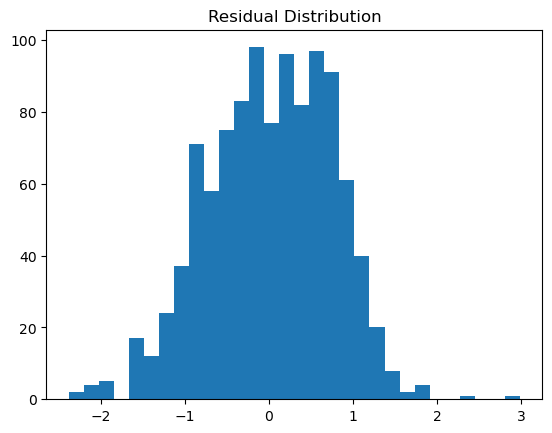

In [301]:
#residual plot
y_pred = xgb_model.predict(X_test)
residuals = y_test.flatten() - y_pred
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.show()

Evaluate feature importance

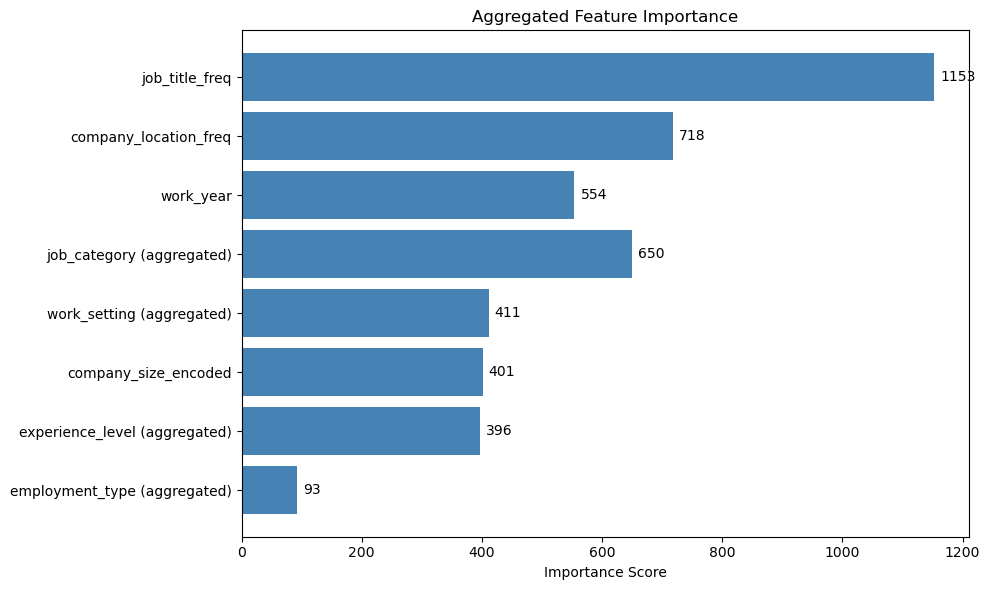

In [304]:
import matplotlib.pyplot as plt

# Aggregated feature importance data
features = [
    'job_title_freq',
    'company_location_freq',
    'work_year',
    'job_category (aggregated)',
    'work_setting (aggregated)',
    'company_size_encoded',
    'experience_level (aggregated)',
    'employment_type (aggregated)'
]

importance_scores = [1153, 718, 554, 650, 411, 401, 396, 93]

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(features, importance_scores, color='steelblue')
plt.xlabel('Importance Score')
plt.title('Aggregated Feature Importance')

# Add value labels to bars
for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}', va='center')

# Invert y-axis to have the highest importance on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
